# PDEs 3 Workshop 4

Welcome to the fourth workshop of the PDE 3 (Numerical) course.

## In this Workshop:
- The Cranck-Nicolson method
- Bonus question: Comparing flow in different materials


In [1]:
# Run this cell before continuing.
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import Normalize
import matplotlib.cm as cm

## Crank-Nicolson method:

Here we will use the Crank-Nicolson method to solve the transient diffusion equation.
This governs the flow of water in a porous medium, such as a filter bed, and is given by:

$$ \dfrac{S}{T}\dfrac{\partial h}{\partial t}+\dfrac{R}{T}=\dfrac{\partial^2 h}{\partial x^2},$$

where $h$ is the height of the hydraulic head (the water level), $T$ is the transmissivity of the media, $S$ is the storage coefficient (the volume of liquid stored per cubic meter of media per meter of pressure head), and $R$ is recharge rate (a source term representing injection of liquid into the media)
subject to certain boundary conditions. For simplicity, we will only consider the case where $R=0$ in this workshop.

In all cases the water level is initially uniform with a height of 1.6 m, and the filter bed is 50 m long. Furthermore, the outlet pipe is set at $H_0 = 1.0$ m above the bottom of the bed. The pipe is sufficiently large to handle the maximum flow rate out of the bed. 

We can write the Crank-Nicholson scheme for this problem in the finite difference form as:

$$\dfrac{h_i^{n+1}-h_i^n}{\Delta t} = \kappa \left[ \dfrac{h_{i-1}^{n+1}-2h_i^{n+1}+h_{i+1}^{n+1}}{2\Delta x^2} + \dfrac{h_{i-1}^{n}-2h_i^{n}+h_{i+1}^{n}}{2\Delta x^2} \right] $$

where $h_i^n$ is the hydraulic head at position $x_i$ and time $t_n$, and $\kappa = \dfrac{T}{S}$.

The setup and stencil for this problem is shown below:

<div>
<img src="1DGrid.png" width="750"/>
</div>


In the lectures, we have shown that we can write the Crank-Nicholson scheme as a matrix equation. This is very similar to the matrix method that we used to solve the Laplace equation in Workshop 3. In this workshop, for better clarity on how we will implement the scheme, we will write the matrix equation as:

$$\mathbf{A}\mathbf{h}^{n+1}=\mathbf{B}\mathbf{h}^n + \mathbf{b},$$
where $\mathbf{A}$ and $\mathbf{B}$ are matrices which control the iteration and $\mathbf{b}$ is a vector that depends on the boundary conditions. In this notation, on the right hand side, we have split contributions that correspond to the boundary conditions ($\mathbf{b}$) and from other nodes at time step $n$ ($\mathbf{B}\mathbf{h}^n$). Note that in the lectures, we have lumped everything on the right hand side.

### a)

For the interior grid points, away from the boundaries, the finite difference approximation of the Crank-Nicolson scheme can be rearranged as 

$$-r_xh_{i-1}^{n+1}+ (2+2r_x) h_i^{n+1}-r_xh_{i+1}^{n+1} = r_xh_{i-1}^{n}+ (2-2r_x) h_i^{n}+r_xh_{i+1}^{n},$$

where $r_x=\dfrac{\kappa \Delta t}{\Delta x^2}$.

At $x = 0$, we have a Neumann boundary condition, $\dfrac{\partial h}{\partial x}=0$ and at $x = 50$, we have a Dirichlet boundary condition, $h=H_0$. Substitute these boundary conditions into the above equation, and find the form of the simultaneous equations for those grid points neighbouring the boundary nodes (i.e., $i = 1$ and $i = N-2$).

[**Hint:** You will need to use the central difference scheme to approximate the derivative for the Neumann boundary condition.]

<font color='orange'>Your answer goes here. Double-click the cell to modify it.</font>

<font color='red'>

### Solution:

From the interior grid points we have:

$$-r_x h_{i-1}^{n+1}+\left(2+2 r_x\right) h_i^{n+1}-r_x h_{i+1}^{n+1}=r_x h_{i-1}^n+\left(2-2 r_x\right) h_i^n+r_x h_{i+1}^n$$

For the Neumann boundary condition at $x=0$, we need to use the central difference scheme to approximate the derivative:

$$\dfrac{\partial h}{\partial x}=\dfrac{h_{i+1}-h_{i-1}}{2\Delta x},$$

so computing the derivative at $i=1$ gives:

$$\dfrac{h_{2}-h_{0}}{2\Delta x}=0.$$

Rearranging for $h_0$ and substituting into the equation above gives:

$$\underbrace{\left(2+2 r_x\right) h_1^{n+1}-2r_x h_{2}^{n+1}}_{\text{Unknown } \left(\text{Matrix } A\right)}=\underbrace{\left(2-2 r_x\right) h_1^n+2r_x h_{2}^n}_{\text{Known }\left(\text{Matrix } B\right)}.$$ 

Now, we need to implement the Dirichlet boundary condition at $x=50$, which gives $h_{N-1}=H_0$. Substituting this into the equation above gives:

$$\underbrace{-r_x h_{N-3}^{n+1}+\left(2+2 r_x\right) h_{N-2}^{n+1}}_{\text{Unknown } \left(\text{Matrix } A\right)}=\underbrace{r_x h_{N-3}^n + \left(2-2 r_x\right) h_{N-2}^n}_{\text{Known }\left(\text{Matrix } B\right)} + \underbrace{2r_x H_0}_{\text{Boundary Term } \left(\text{Vector } \mathbf{b}\right)}.$$

</font>

### b)

Write down the elements of $A$, $B$ and $\mathbf{b}$ for the interior grid points and those neighbouring boundary nodes, i.e., consider $i = 1$, $1<i<N-2$, and $i = N-2$. At this point, it is useful to introduce a $k$-index that excludes the boundary nodes and only runs on the unknown grid points, such that $k = i-1$ (see the diagram provided above). The $k$ index is used to place elements into $A$, $B$ and $\mathbf{b}$.

<font color='orange'>Your answer goes here. Double-click the cell to modify it.</font>

<font color='red'>

### Solution:

From the interior grid points we have

$$-r_x h_{i-1}^{n+1}+\left(2+2 r_x\right) h_i^{n+1}-r_x h_{i+1}^{n+1}=r_x h_{i-1}^n+\left(2-2 r_x\right) h_i^n+r_x h_{i+1}^n.$$

For example, for $i = 2$ or $k = 1$, the second row of $A$, $B$ and $\mathbf{b}$ are given by

$$A_1 = \begin{bmatrix}
-r_x & 2+2r_x & -r_x & 0 & 0\\
\end{bmatrix},
B_1 = \begin{bmatrix}
r_x & 2-2r_x & r_x & 0 & 0\\
\end{bmatrix},
\mathbf{b}_1 = \begin{bmatrix}
0\\
\end{bmatrix}.$$

(Note that we are using the k-based indexing here, so the second row has index 1. This will be important later when we code the results.)

We can follow similar steps to find the elements for all other interior bulk nodes of the matrix.

Now, we can do the same for the nodes at the edge of the bulk:

For $i = 1$ or $k = 0$ (the first bulk node), we have:

$$A_0 = \begin{bmatrix}
2+2r_x & -2r_x & 0 & 0 & 0\\
\end{bmatrix},
B_0 = \begin{bmatrix}
2-2r_x & 2r_x & 0 & 0 & 0\\
\end{bmatrix},
\mathbf{b}_0 = \begin{bmatrix}
0\\
\end{bmatrix}.$$

For $i =N-2$ or $k = N-3$ (the last bulk node), we have:

$$A_{N-3} = \begin{bmatrix}
0 & 0 & 0 & -r_x & 2+2r_x\\
\end{bmatrix},
B_{N-3} = \begin{bmatrix}
0 & 0 & 0 & r_x & 2-2r_x\\
\end{bmatrix},
\mathbf{b}_{N-3} = \begin{bmatrix}
2r_x H_0\\
\end{bmatrix}.$$

</font>

Now that we have worked out the form of the matrix equation we can write it in code to find the solution to the transient diffusion equation.

Below, we implement the ``Grid_1D`` class. This is very similar to the ``Grid`` class that we have used in previous workshops. 
However, the key difference is that this grid is only implemented in one dimension (as we will iterate over the time dimension to find a solution).

Run the cell below to continue.

In [2]:
# Implement the grid class
# Run this cell before continuing

class Grid_1D:
    """A 1D grid implementation to be used with the Crank-Nicholson method."""
    def __init__(self, ni: int) -> None:
        self.ni = ni
        self.origin = 0
        self.extent = 1

        self.x = np.zeros(ni, dtype = float)
        self.h = np.zeros(ni, dtype = float)

    def set_origin(self, x0: float) -> None:
        """Set the origin of the grid."""
        self.origin = x0

    def set_extent(self, x1: float) -> None:
        """Set the extent of the grid."""
        self.extent = x1

    def Delta_x(self) -> float:
        """The spacing in the x-direction."""
        return (self.extent - self.origin) / (self.ni - 1)
    
    def generate(self, Quiet: bool = True) -> None:
        self.x = np.linspace(self.origin, self.extent, self.ni, endpoint=True)

        if not Quiet:
            print(self)

    def __str__(self):
        """A quick function to tell us about the grid. This will be what is displayed if you try to print the Grid object."""
        return f"1D Grid Object: Uniform grid grid with {self.ni} points, from {self.origin} to {self.extent}."
    

Below is a partial implementation of the function ``assemble_CN_matrices``. Which implements the work that you have done above to set up the matrix equation for the Crank-Nicholson method.

### c)

Complete the function ``assemble_CN_matrices`` by implementing the constant ``r_x`` defined in part (a) as well as the matrix ``B`` and the vector ``b``, as defined in part (b). The implementaton for matrix ``A`` is already provided, which should provide some hints on how you may implement matrix ``B``.

In [3]:
def assemble_CN_matries(mesh: Grid_1D, delta_t, kappa, H0)-> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Assemble the matrices for the Crank-Nicholson
    method for a 1D diffusion problem.

    Parameters:
    -----------
    mesh: Grid_1D
        The grid to assemble the matrices for.
    delta_t: float
        The time step.
    kappa: float
        The diffusion coefficient.
    H0: float
        The Dirichlet boundary condition for the problem.
    
    Returns:
    --------
    A: np.ndarray
        The matrix for the implicit terms.
    B: np.ndarray
        The matrix for the explicit terms.

    b: np.ndarray
        The vector for the right-hand side of the equation.
    """
    # First, we need to determine the constants to the values calculated above.

    # Your code here:
    r_x = np.nan

    ### BEGIN SOLUTION ###

    r_x = kappa*delta_t/(mesh.Delta_x()**2)

    ### END SOLUTION ###

    if r_x == np.nan:
        raise NotImplementedError("You need to implement rx for the Crank-Nicholson method.")

    # Create the matrix, then get them to put the correct terms in the correct places
    # You do not need to change anything here.

    A = np.zeros((mesh.ni-2, mesh.ni-2), dtype = float)
    B = np.zeros_like(A, dtype=float)
    b = np.zeros(mesh.ni-2, dtype = float)

    # Implement the matrix A and B.
    # Note that for simplicity, we use the martix index notation k = i-1, 0 <= k <= ni-3, rather than the grid notation i, 0<= i <= ni-1.
    for k in range(1, mesh.ni-3):
        # Implementation of A interior
        A[k,k-1] = -r_x
        A[k,k] = 2 + 2*r_x
        A[k,k+1] = -r_x

        # Implementation of B interior
        # Your code here:

        ### BEGIN SOLUTION ###

        B[k,k-1] = r_x
        B[k,k] = 2 - 2*r_x
        B[k,k+1] = r_x

        ### END SOLUTION ###

    # Implementation of boundaries in A, B and b

    # A
    A[0,0] = 2 + 2*r_x
    A[0,1] = - 2*r_x
    A[-1,-1] = 2 + 2*r_x
    A[-1,-2] = - r_x

    # Your code here:

    ### BEGIN SOLUTION ###
    # B
    B[0,0] = 2 - 2*r_x
    B[0,1] = 2 *r_x
    B[-1,-1] = 2 - 2*r_x
    B[-1,-2] = r_x

    # b
    b[0] = 0
    b[-1] = 2 * r_x * H0
    # Note that we only apply the boundary conditions in x here. 
    # The initial confditions for t=0 are applied when we iterate over t.

    ### END SOLUTION ###

    if (B == np.zeros_like(B, dtype=float)).all() or (b == np.zeros_like(b, dtype=float)).all():
        raise NotImplementedError("You need to implement the matrices for the Crank-Nicholson method.")

    return A, B, b

Now, we run some tests to ensure that ``assemble_CN_matrix`` is working correctly and to check what it looks like.

Check to ensure the matirces and vectors take the form that you expect.

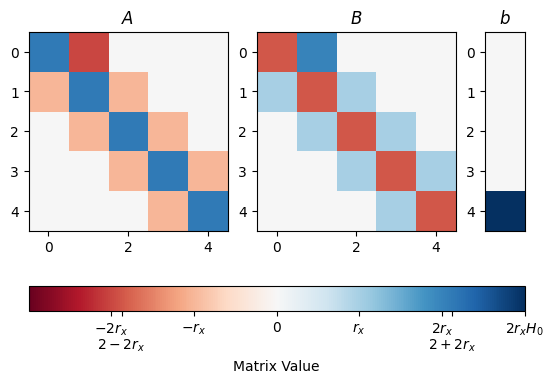

In [4]:
### BEGIN TESTS ###

# A test cell to show the form of the matrix.
mesh = Grid_1D(7)
mesh.set_extent(1.5)
A, B, b = assemble_CN_matries(mesh = mesh, delta_t=1, kappa=1, H0=1.5)

# You don't need to worry about this section of the code too much; it is just to ensure that the colourmap used is symmetric about 0.
supmax = np.max([np.max(np.abs(A)), np.max(np.abs(B)), np.max(np.abs(b))])
nrom = Normalize(vmin=-supmax, vmax=supmax)

# Do the plotting
fig, axs = plt.subplots(1,3,width_ratios=(1+1.85*A.shape[0], 1+1.85*B.shape[0], 2.05))

axs[0].imshow(A, aspect='equal', cmap=cm.RdBu, norm=nrom)
axs[1].imshow(B, aspect='equal', cmap=cm.RdBu, norm=nrom)
axs[2].imshow(np.transpose(np.array([b])), aspect='equal', cmap=cm.RdBu, norm=nrom)

cbar = plt.colorbar(cm.ScalarMappable(norm=nrom, cmap=cm.RdBu), ax=axs, orientation='horizontal', label='Matrix Value')
rx = 16
# Here, we add ticks which you may find useful...
cbar.set_ticks([2-2*rx, -rx, 0, rx, 2*rx*1.5, 2+2*rx, 2*rx, -2*rx])
cbar.set_ticklabels([f'\n$2-2r_x$', r'$-r_x$', r'$0$', r'$r_x$', r'$2r_xH_0$', f'\n$2+2r_x$', r'$2r_x$', r'$-2r_x$'])


axs[2].set_xticks([])
axs[0].set_title("$A$")
axs[1].set_title("$B$")
axs[2].set_title("$b$")

plt.show()

### END TESTS ###

You should see that the matrices $A$ and $B$ are tri-diagonal and that the boundary conditions have been applied in $b$.

We now need to solve the matrix equation we had above,

$$A\mathbf{h}^{n+1} = B\mathbf{h}^n + \mathbf{b},$$

to find $\mathbf{h}^{n+1}$ given the previous timestep $\mathbf{h}^n$.
To do this, we first construct a temporary vector
$$\mathbf{d}^n = B\mathbf{h}^n + \mathbf{b},$$

which we can then use to solve the matrix equation 
$$A\mathbf{h}^{n+1} = \mathbf{d}^n.$$

### d)

Write a function ``solve_CN_iteration`` below to solve the matrix equation and return the solution at the next time step (given the current timestep).

It should take the following inputs:
- ``A``: The matrix $A$.
- ``B``: The matrix $B$.
- ``b``: The vector $\mathbf{b}$.
- ``h_current``: The vector $\mathbf{h}^n$.

and should return the solution at the next time step, $\mathbf{h}^{n+1}$.

[**Hint:** You may find the ``@`` operator useful for matrix multiplication in the first step of the matrix equation. You also can use the function [``np.linalg.solve()``](https://numpy.org/doc/2.0/reference/generated/numpy.linalg.solve.html) to solve the second part of the matrix equation.]

In [5]:
# Your code here:

### BEGIN SOLUTION ###

def solve_CN_iteration(A: np.ndarray, B: np.ndarray, b: np.ndarray, h_current: np.ndarray)-> np.ndarray:
    """Solve the Crank-Nicholson iteration for a 1D diffusion problem.

    Parameters:
    -----------
    A: np.ndarray
        The matrix for the implicit terms.
    B: np.ndarray
        The matrix for the explicit terms.
    b: np.ndarray
        The vector for the Dirichlet boundary condition terms.
    h_current: np.ndarray
        The current state of the system.
    
    Returns:
    --------

    h_new: np.ndarray
        The new state of the system.
    """

    # First, we construct the d vector as described above.
    d = B @ h_current + b

    # Then we solve the system of equations to get the next step.
    h_new = np.linalg.solve(A, d)

    return h_new

### END SOLUTION ###

Check to ensure your solver is working correctly.

In [6]:
### BEGIN TESTS ###
A_test = np.identity(3, dtype = int)
B_test = np.identity(3, dtype = int)
B_test[1,1] = 0
b_test = np.array([0,1,0], dtype = int)
h_init_test = np.ones(3, dtype = int)

assert np.all(solve_CN_iteration(A_test, B_test, b_test, h_init_test) == np.array([1,1,1], dtype = int)), "Your solver function does not seem to be returning the correct values for this test case.\nCheck you have implemented the matrix equations above correcrtly.\nIt may help to try this test case by hand first."
### END TESTS ###

Now, we need to successively apply the solver to advance the solution in time. To do this, a partially complete function ``advance_CN_in_time`` is provided below.

### e)

Complete the function by calculating the number of steps of size ``delta_t`` required to reach ``t_stop``, setting up the matrices and implementing the iteration step.

In [7]:
def advance_CN_in_time(mesh: Grid_1D, kappa: float, t_stop: float, delta_t: float) -> tuple[np.ndarray, np.ndarray]:
    """Advance the Crank-Nicholson method in time for a 1D diffusion problem.

    Parameters:
    -----------
    mesh: Grid_1D
        The grid to solve the problem on.
    kappa: float
        The diffusion coefficient.
    t_stop: float
        The time to stop the simulation.
    
    Returns:
    --------
    times: np.ndarray
        The times at which the solution was calculated.
    hs: np.ndarray
        The solutions at each time.
    """

    # Set up the initial conditions and the bounday condition.
    # It is assumed that these input into mesh.h prior to calling this function.

    h_init = mesh.h.copy()[1:-1]
    H0 = mesh.h[-1]

    # Calculate the number of steps to take.
    # Your code here:

    n_steps = np.nan
    ### BEGIN SOLUTION ###
    n_steps = int(t_stop/delta_t)
    ### END SOLUTION ###

    if n_steps == np.nan:
        raise NotImplementedError("You need to implement the number of steps to take in the Crank-Nicholson method.")

    # Set up the time array and the solution array.
    times = np.zeros(n_steps+1, dtype = float)
    # hs is made to be the same size as the bulk for simplicity. 
    # We expand it to include the boundary terms later.
    hs = np.zeros((n_steps+1, mesh.ni-2), dtype = float)
    hs[0] = h_init # Set the initial conditions.


    # Set up the matrices and iterate over the time steps.
    # Your code here:

    A, B, b = np.nan, np.nan, np.nan
    
    ### BEGIN SOLUTION ###

    # Set up the matrices.
    A, B, b = assemble_CN_matries(mesh, delta_t, kappa, H0)

    # Do the iteration
    for i in range(n_steps):
        hs[i+1] = solve_CN_iteration(A, B, b, hs[i])
        times[i+1] = times[i] + delta_t
    
    ### END SOLUTION ###
    if type(A) != np.ndarray or type(B) != np.ndarray or type(b) != np.ndarray:
        raise NotImplementedError("You need to implement the matrices and complete the time iteration for the Crank-Nicholson method.")

    # Add the boundary conditions to the solution array.
    h_out = np.empty((n_steps+1, mesh.ni), dtype = float)
    h_out[:,1:-1] = hs
    h_out[:,0] = h_out[:,1]
    h_out[:,-1] = H0
    return times, h_out


Now that we have successfully implemented the Crank-Nicholson method, we can use it to solve the transient diffusion equation for our filter bed.

The function ``setup_mesh()`` below sets up the mesh with the appropriate parameters for the problem.
Run the cell below to continue. You do not need to modify this cell.

In [8]:
def setup_mesh(npoints: int) -> Grid_1D:
    """Set up the mesh for the 1D diffusion problem."""

    mesh = Grid_1D(npoints)
    mesh.set_origin(0)
    mesh.set_extent(50)
    mesh.generate()
    mesh.h = 1.6*np.ones(mesh.ni, dtype = float)
    mesh.h[-1] = 1.0

    return mesh

### f)

The bed is filled with fine silt with a hydraulic transmissitivity of $T=3.33\times10^{-6}\text{m}^2\text{s}^{-1}$ and a storage coefficient, $S=0.002$.

Set up a mesh with 101 nodes and model the flow through the bed for 30 days with a time step of 60 s.

Produce a plot of the results.

[**Hint:** You may find the function [``plt.plot()``](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) useful for plotting the results. Remember that $\kappa = \dfrac{T}{S}$.]

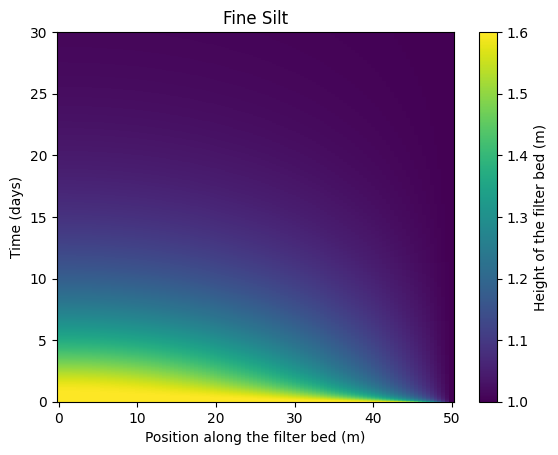

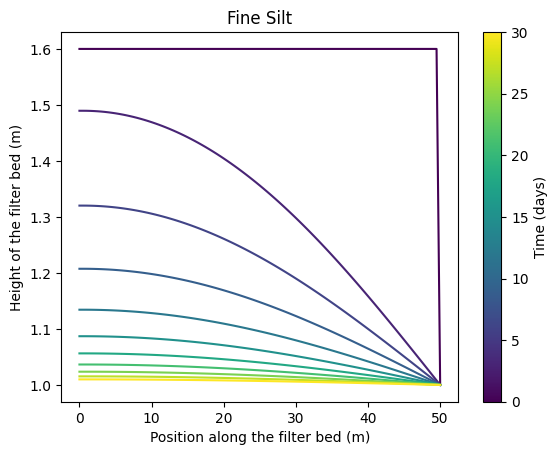

In [9]:
# Your code here:

### BEGIN SOLUTION ###

mesh = setup_mesh(101)

ts, hs = advance_CN_in_time(mesh, 3.33e-6/0.002, 30*24*3600, 60)


fig, ax = plt.subplots()
X, T = np.meshgrid(mesh.x, ts/3600/24)
plt.pcolor(X, T, hs)
plt.xlabel("Position along the filter bed (m)")
plt.ylabel("Time (days)")
plt.title("Fine Silt")
cbar = plt.colorbar()
cbar.set_label("Height of the filter bed (m)")
plt.show()


# An alternative solution is to plot lines for specific timesteps.
fig, ax = plt.subplots()

# Here we set the colour of each line according to the time.
# This is slightly more complex, though it does allow us to see the evolution of the system more clearly.
colours = plt.cm.viridis(np.linspace(0, 1, len(ts)))
cbar = plt.colorbar(cm.ScalarMappable(norm=Normalize(vmin=0, vmax=ts[-1]/3600/24)), ax=ax)
cbar.set_label('Time (days)')

# Do the plotting
for i in range(0, len(ts), len(ts)//10):
    ax.plot(mesh.x, hs[i], color=colours[i])

plt.xlabel("Position along the filter bed (m)")
plt.ylabel("Height of the filter bed (m)")
plt.title("Fine Silt")
plt.show()

### END SOLUTION ###

## Bonus Question

Now, we will use the tools that we have developed to compare the flow of water through different materials.

(i) Model the flow of water through a bed of clay with a transmissivity of $T=4.70\times10^{-9}\text{ m}^2\text{s}^{-1}$ and a storage coefficient, $S=3.25\times10^{-4}$, for 365 days (1 year).

(ii) Model the flow of water through a bed of gravel with a transmissivity of $T=3.0\times10^{-4}\text{ m}^2\text{s}^{-1}$ and a storage coefficient, $S=7.87\times10^{-5}$, for 60 minutes.

In each case, you will need to choose an appropriate value of ``delta_t``. 

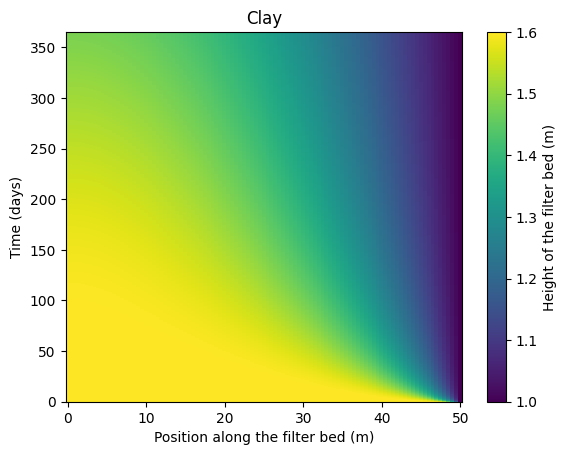

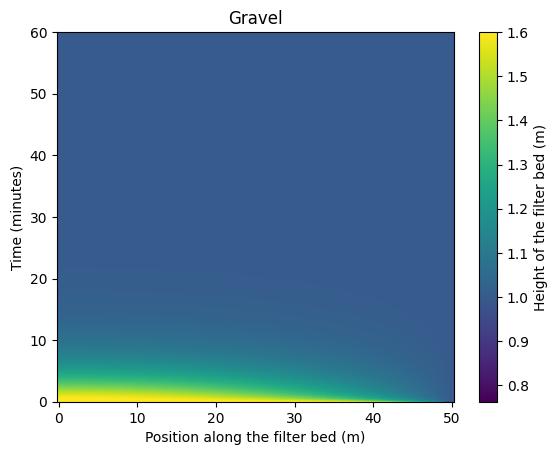

In [10]:
# Your code here:

### BEGIN SOLUTION ###

# First, we try for clay

mesh = setup_mesh(101)

ts, hs = advance_CN_in_time(mesh, 4.7e-9/3.25e-4, 365*24*3600, 3600)

fig, ax = plt.subplots()
X, T = np.meshgrid(mesh.x, ts/3600/24)
plt.pcolor(X, T, hs)
plt.xlabel("Position along the filter bed (m)")
plt.ylabel("Time (days)")
plt.title("Clay")
cbar = plt.colorbar()
cbar.set_label("Height of the filter bed (m)")
plt.show()

# Now we do the same for gravel

mesh = setup_mesh(101)

ts, hs = advance_CN_in_time(mesh, 3.0e-4/7.87e-5, 3600, 1)

fig, ax = plt.subplots()
X, T = np.meshgrid(mesh.x, ts/60)
plt.pcolor(X, T, hs)
plt.xlabel("Position along the filter bed (m)")
plt.ylabel("Time (minutes)")
plt.title("Gravel")
cbar = plt.colorbar()
cbar.set_label("Height of the filter bed (m)")
plt.show()

### END SOLUTION ###